In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/jandavidridder/Desktop/Masterarbeit/src/PYTHON/MYCODE/routines")
from utils import load_json_results

paths = {
    "lower": "/Users/jandavidridder/Desktop/Masterarbeit/src/experiments/002_uncertain_open_loop_kpis/2025-10-16/results/pc_narx/lower",
    "upper": "/Users/jandavidridder/Desktop/Masterarbeit/src/experiments/002_uncertain_open_loop_kpis/2025-10-16/results/pc_narx/upper",
}

lower = load_json_results(result_dir=paths["lower"], n_trajectories=-1)["_x"][..., :24].reshape((99, 480, 6, 4))
upper = load_json_results(result_dir=paths["upper"], n_trajectories=-1)["_x"][..., :24].reshape((99, 480, 6, 4))
lower = np.swapaxes(lower, 0, 1)
upper = np.swapaxes(upper, 0, 1)

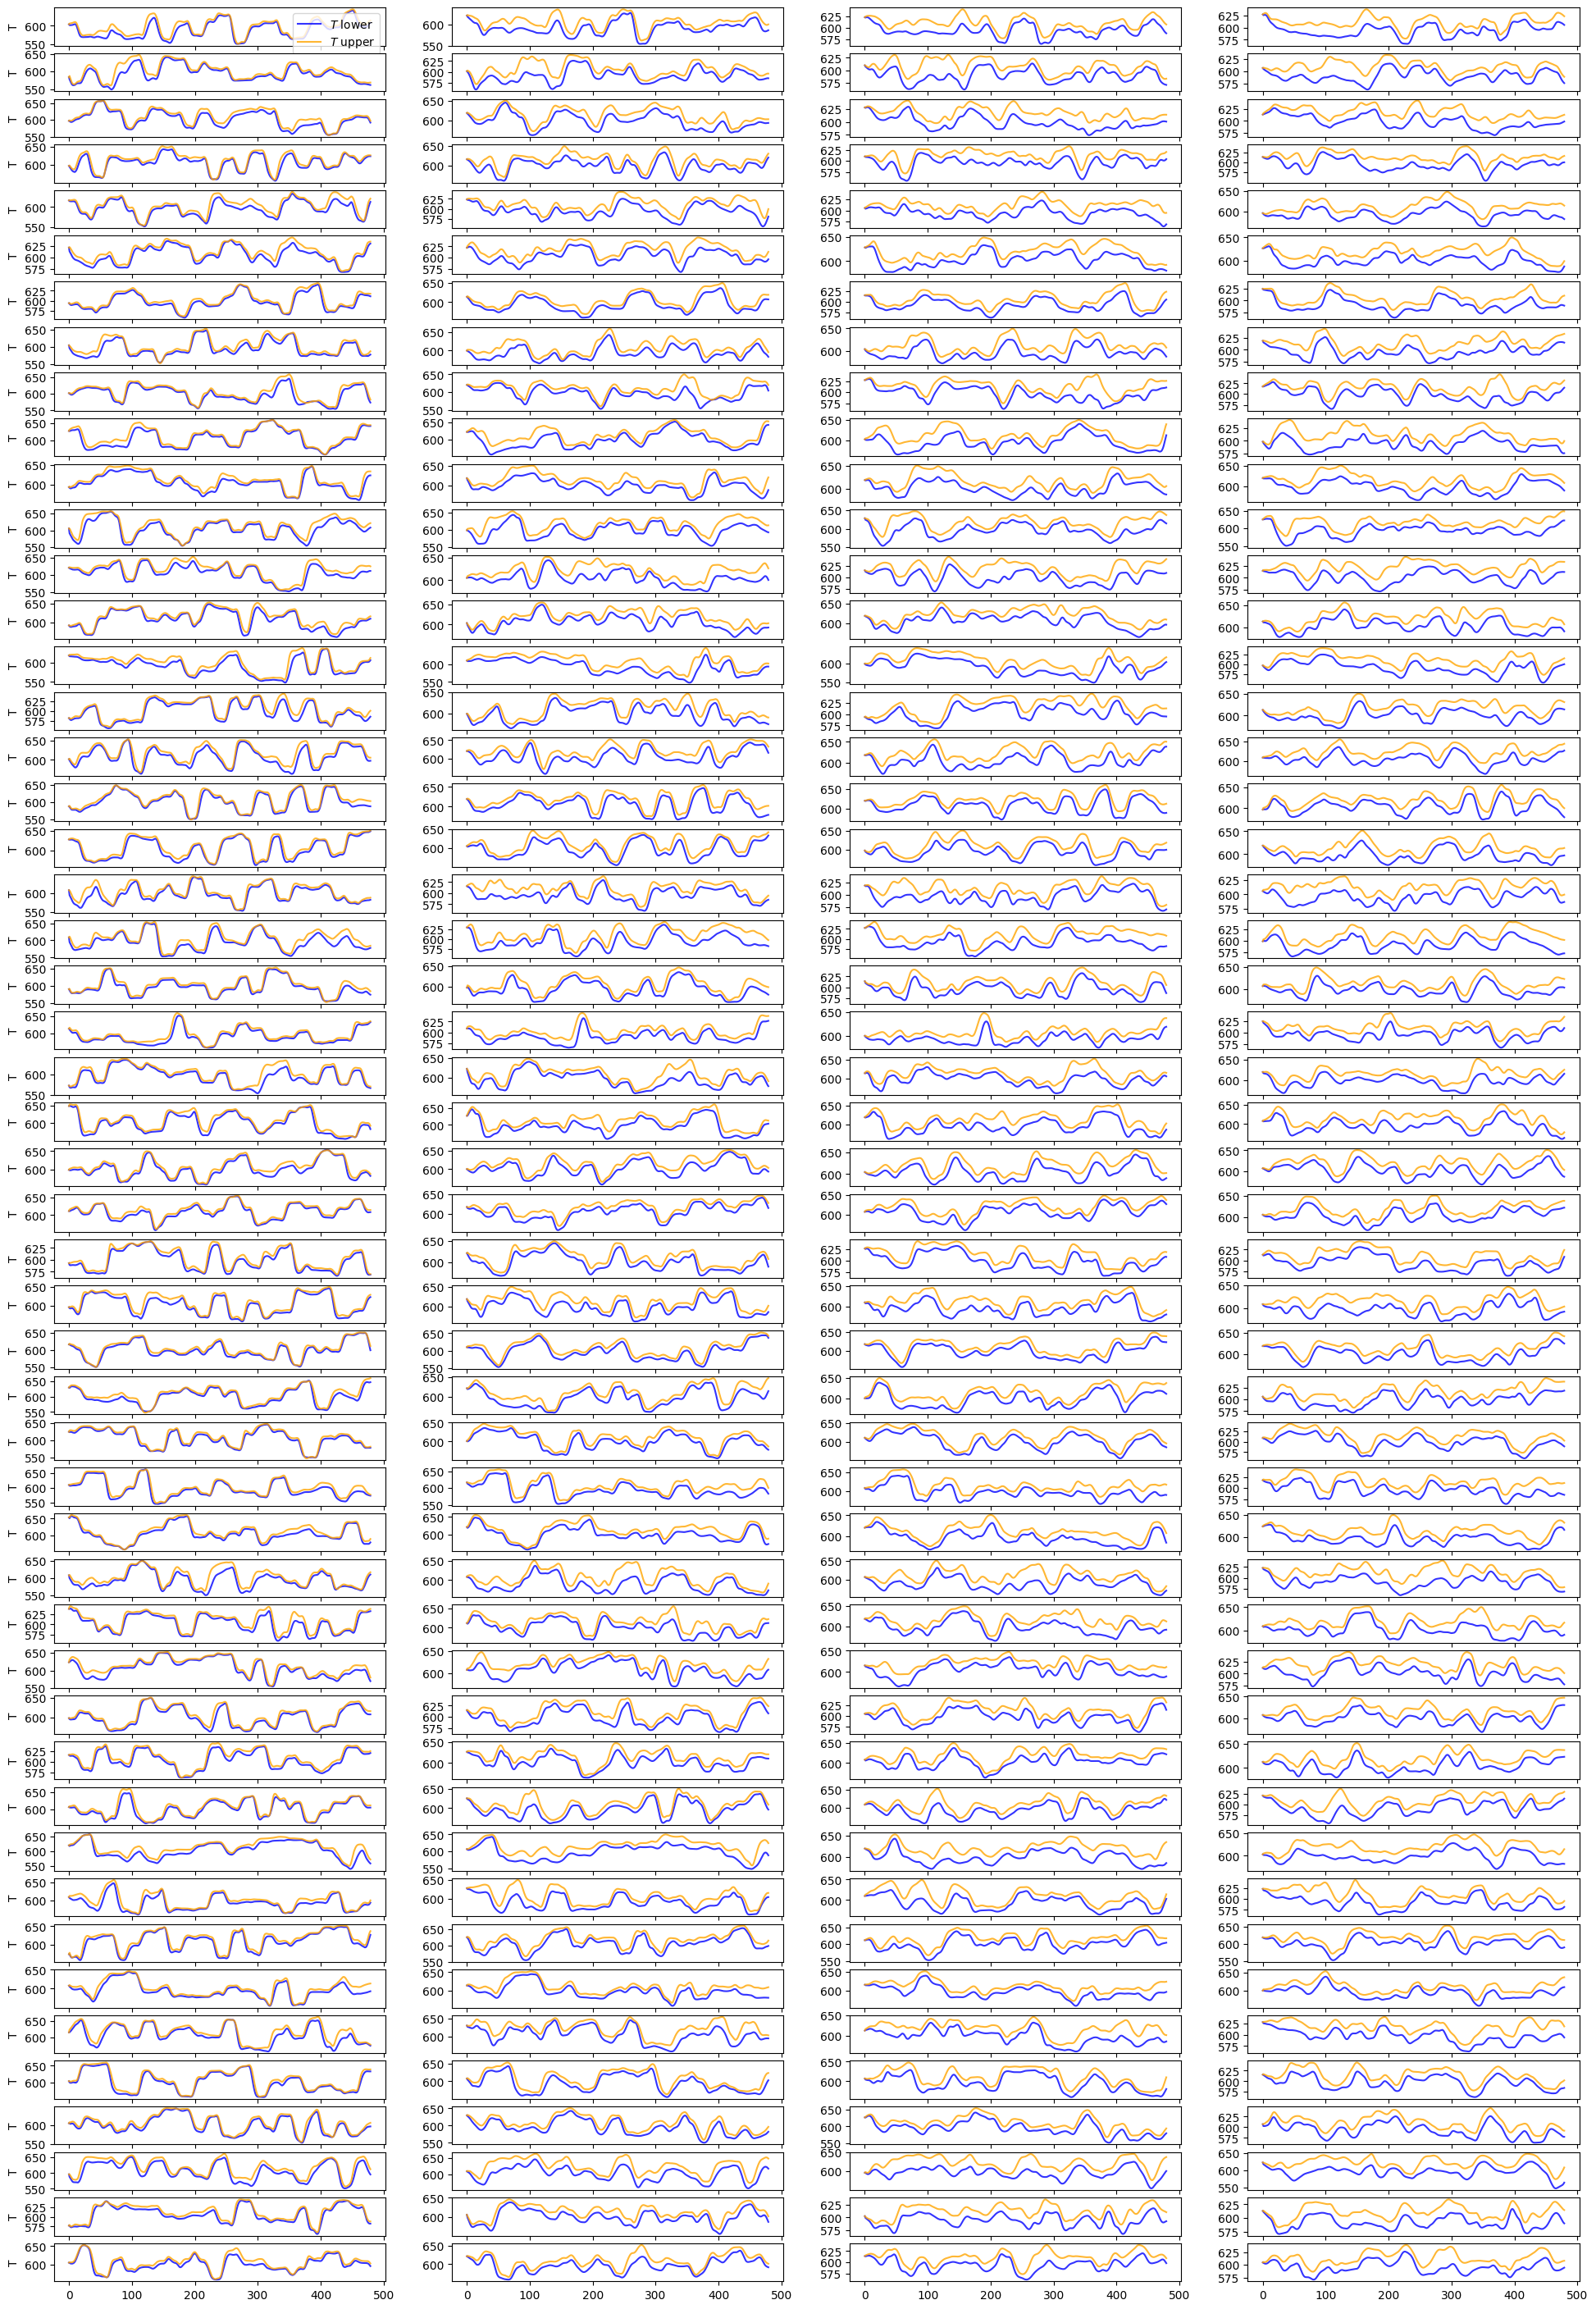

In [4]:

time = np.arange(0, 480, 1)
n_trajects = 50

fig, ax = plt.subplots(n_trajects, 4, figsize=(24, 36), sharex=True)
ylabels = ["c_E", "c_O2", "c_EO", "c_H2O", "c_CO2", "T"]

for i in range(n_trajects):
    for z in range(4):
        ax[i, 0].set_ylabel(ylabels[-1])
        ax[i, z].plot(time, lower[:, i, -1, z], label="$T$ lower", alpha = 0.8, color="blue")
        ax[i, z].plot(time, upper[:, i,-1, z], label="$T$ upper", alpha = 0.8, color="orange")
ax[0, 0].legend()